In [139]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [140]:
df = pd.read_csv('weatherAUS.csv')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [142]:
pd.set_option('display.max_columns', None)

In [143]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Dividir datos de entrenamiento y testeo

In [144]:
x = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [145]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((116368, 22), (29092, 22), (116368,), (29092,))

In [146]:
df.shape

(145460, 23)

# Tratamiento de nulos

In [147]:
# nulos por columna
X_train.isna().sum()

Date                 0
Location             0
MinTemp           1178
MaxTemp            998
Rainfall          2604
Evaporation      50329
Sunshine         55942
WindGustDir       8250
WindGustSpeed     8202
WindDir9am        8429
WindDir3pm        3397
WindSpeed9am      1408
WindSpeed3pm      2457
Humidity9am       2117
Humidity3pm       3616
Pressure9am      12061
Pressure3pm      12042
Cloud9am         44757
Cloud3pm         47548
Temp9am           1405
Temp3pm           2897
RainToday         2604
dtype: int64

In [148]:
# porcentaje de nulos por columna
porcentajes_nulos = (X_train.isna().sum() / len(df)) * 100

# Mostrar los resultados
print(porcentajes_nulos)

Date              0.000000
Location          0.000000
MinTemp           0.809845
MaxTemp           0.686099
Rainfall          1.790183
Evaporation      34.599890
Sunshine         38.458683
WindGustDir       5.671662
WindGustSpeed     5.638664
WindDir9am        5.794720
WindDir3pm        2.335350
WindSpeed9am      0.967964
WindSpeed3pm      1.689124
Humidity9am       1.455383
Humidity3pm       2.485907
Pressure9am       8.291627
Pressure3pm       8.278565
Cloud9am         30.769284
Cloud3pm         32.688024
Temp9am           0.965901
Temp3pm           1.991613
RainToday         1.790183
dtype: float64


In [149]:
nan_por_fila = X_train.isna().sum(axis=1)

# Filtrar filas con más de un NaN
filas_con_mas_de_un_nan = (nan_por_fila > 1).sum()

print(f"Número de filas en X_train con más de un NaN en las columnas: {filas_con_mas_de_un_nan}")

# Filtrar filas con más de dos NaN
filas_con_mas_de_un_nan = (nan_por_fila > 2).sum()

print(f"Número de filas en X_train con más de dos NaN en las columnas: {filas_con_mas_de_un_nan}")

# Filtrar filas con más de tres NaN
filas_con_mas_de_un_nan = (nan_por_fila > 3).sum()

print(f"Número de filas en X_train con más de tres NaN en las columnas: {filas_con_mas_de_un_nan}")

Número de filas en X_train con más de un NaN en las columnas: 62279
Número de filas en X_train con más de dos NaN en las columnas: 47775
Número de filas en X_train con más de tres NaN en las columnas: 40006


## Nulos en Y_train

In [150]:
y_train.isna().sum()

np.int64(2607)

In [151]:
y_train.dropna(inplace=True)
# eliminamos en X_train las filas correspondientes a y_train que fueron eliminadas
X_train = X_train.loc[y_train.index]
# En y_test
y_test.dropna(inplace=True)
X_test = X_test.loc[y_test.index]

# Consigna 1 - Creacion de variable regiones

Se  solicita  en  primera  instancia  crear  clusters  con  las  ciudades del Dataset para 
catalogarlas en otra categoría: regiones. La cantidad de regiones será definida por 
cada  grupo,  observarlas  en  un  gráfico  de  latitud  y  longitud  para  acompañar  la 
decisión.

In [152]:
X_train["Location"].unique()

array(['Albany', 'Katherine', 'MelbourneAirport', 'Williamtown',
       'Adelaide', 'Nuriootpa', 'Albury', 'Mildura', 'Launceston',
       'Townsville', 'Cobar', 'Uluru', 'Brisbane', 'Darwin', 'Portland',
       'Melbourne', 'Cairns', 'Sydney', 'Sale', 'Dartmoor',
       'AliceSprings', 'Woomera', 'MountGinini', 'Ballarat', 'NorahHead',
       'Tuggeranong', 'MountGambier', 'Perth', 'Walpole', 'WaggaWagga',
       'Newcastle', 'Hobart', 'SydneyAirport', 'BadgerysCreek', 'Bendigo',
       'SalmonGums', 'Richmond', 'GoldCoast', 'Moree', 'CoffsHarbour',
       'PearceRAAF', 'Canberra', 'Watsonia', 'Witchcliffe',
       'NorfolkIsland', 'PerthAirport', 'Penrith', 'Nhil', 'Wollongong'],
      dtype=object)

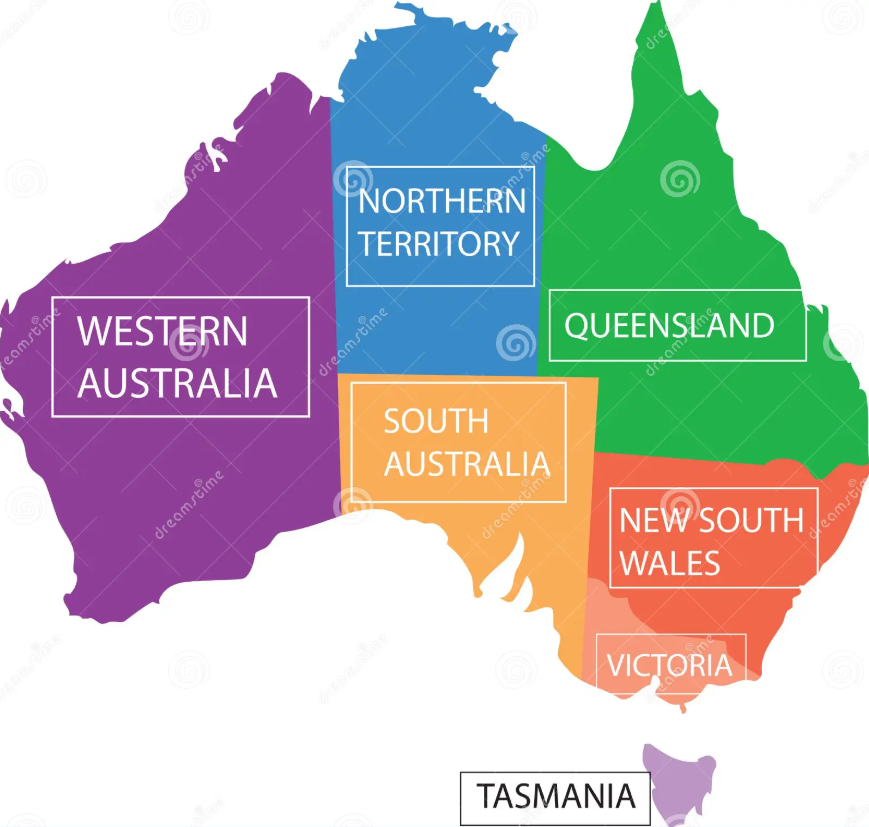

### Intento 1 - Agrupando por provincia

In [153]:
# https://www.kaggle.com/datasets/maryamalizadeh/worldcities-australia?resource=download
df_aus = pd.read_csv('au.csv')

In [154]:
df_aus.shape

(1035, 9)

In [155]:
df_aus.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Sydney,-33.8650,151.2094,Australia,AU,New South Wales,admin,5312163,4840600
1,Melbourne,-37.8136,144.9631,Australia,AU,Victoria,admin,5078193,4529500
2,Brisbane,-27.4678,153.0281,Australia,AU,Queensland,admin,2514184,2360241
3,Perth,-31.9522,115.8589,Australia,AU,Western Australia,admin,2059484,2039200
4,Adelaide,-34.9289,138.6011,Australia,AU,South Australia,admin,1345777,1295714


In [156]:
# Diccionario para normalizar nombres de ubicaciones
normalizar_ubicaciones = {
    'MelbourneAirport': 'Melbourne',
    'SydneyAirport': 'Sydney',
    'PerthAirport': 'Perth',
    'PearceRAAF': 'Perth',
    'WaggaWagga': 'Wagga Wagga',  # Corregir formato
    'CoffsHarbour': 'Coffs Harbour',  # Corregir formato
    'MountGambier': 'Mount Gambier',  # Corregir formato
    'Tuggeranong': 'Canberra',  # Suburbio de Canberra
    'BadgerysCreek': 'Sydney',  # Suburbio de Sydney
    'NorahHead': 'Newcastle',  # Cerca de Newcastle
    'Penrith': 'Sydney',  # Suburbio de Sydney
    'Richmond': 'Sydney',  # Suburbio de Sydney
    'GoldCoast': 'Gold Coast',  # Corregir formato
    'NorfolkIsland': 'Norfolk Island',  # Isla externa
    'MountGinini': 'Canberra',  # Cerca de Canberra
    'Nhile': 'Nhill',  # Corregir error tipográfico
    'Watsonia': 'Melbourne',  # Suburbio de Melbourne
    'Williamtown' : 'Williamstown',  # error tipografico
}

# Aplicar normalización a la columna Location
X_train['Location_normalized'] = X_train['Location'].replace(normalizar_ubicaciones)

# Crear diccionario de mapeo de ciudades a provincias desde df_aus
mapeo_ciudades = dict(zip(df_aus['city'], df_aus['admin_name']))

# Mapear admin_name usando la columna normalizada
X_train['provincia'] = X_train['Location_normalized'].map(mapeo_ciudades)
# X_test
X_test["Location_normalized"] = X_test['Location'].replace(normalizar_ubicaciones)
X_test["provincia"] = X_test['Location_normalized'].map(mapeo_ciudades)

# Eliminar la columna temporal Location_normalized
X_train = X_train.drop(columns=['Location_normalized'])
X_test = X_test.drop(columns=['Location_normalized'])

In [157]:
print(X_train['provincia'].isna().sum())

18919


In [158]:
X_train.loc[X_train['Location'] == 'NorfolkIsland', 'provincia'] = 'Norfolk Island Territory'

X_train.loc[X_train['Location'] == 'Nhil', 'provincia'] = 'Victoria'
X_train.loc[X_train['Location'] == 'Dartmoor', 'provincia'] = 'Victoria'
X_train.loc[X_train['Location'] == 'Woomera', 'provincia'] = 'South Australia'
X_train.loc[X_train['Location'] == 'Witchcliffe', 'provincia'] = 'Western Australia'
X_train.loc[X_train['Location'] == 'SalmonGums', 'provincia'] = 'Western Australia'
X_train.loc[X_train['Location'] == 'Walpole', 'provincia'] = 'Western Australia'
X_train.loc[X_train['Location'] == 'AliceSprings', 'provincia'] = 'Northern Territory'
X_train.loc[X_train['Location'] == 'Uluru', 'provincia'] = 'Northern Territory'

# X_test
X_test.loc[X_test['Location'] == 'NorfolkIsland', 'provincia'] = 'Norfolk Island Territory'
X_test.loc[X_test['Location'] == 'Nhil', 'provincia'] = 'Victoria'
X_test.loc[X_test['Location'] == 'Dartmoor', 'provincia'] = 'Victoria'
X_test.loc[X_test['Location'] == 'Woomera', 'provincia'] = 'South Australia'
X_test.loc[X_test['Location'] == 'Witchcliffe', 'provincia'] = 'Western Australia'
X_test.loc[X_test['Location'] == 'SalmonGums', 'provincia'] = 'Western Australia'
X_test.loc[X_test['Location'] == 'Walpole', 'provincia'] = 'Western Australia'
X_test.loc[X_test['Location'] == 'AliceSprings', 'provincia'] = 'Northern Territory'
X_test.loc[X_test['Location'] == 'Uluru', 'provincia'] = 'Northern Territory'

In [159]:
print(X_train['provincia'].isna().sum())

0


In [160]:
# Listar Location y admin_name, eliminando duplicados
lista_ubicaciones = X_train[['Location', 'provincia']].drop_duplicates()

print(lista_ubicaciones)

                Location                     provincia
111548            Albany             Western Australia
142528         Katherine            Northern Territory
65304   MelbourneAirport                      Victoria
40651        Williamtown               South Australia
97487           Adelaide               South Australia
103132         Nuriootpa               South Australia
2551              Albury               New South Wales
71662            Mildura                      Victoria
133371        Launceston                      Tasmania
95882         Townsville                    Queensland
8397               Cobar               New South Wales
144564             Uluru            Northern Territory
85224           Brisbane                    Queensland
139941            Darwin            Northern Territory
77476           Portland                      Victoria
69266          Melbourne                      Victoria
87978             Cairns                    Queensland
31290     

### Intentar obtener latitud y longitud

In [161]:
# Aplicar normalización a la columna Location
X_train['Location_normalized'] = X_train['Location'].replace(normalizar_ubicaciones)
# Diccionarios de mapeo
mapeo_lat = dict(zip(df_aus['city'], df_aus['lat']))
mapeo_lon = dict(zip(df_aus['city'], df_aus['lng']))
# Usá Location_normalized para encontrar las coordenadas
X_train['lat'] = X_train['Location_normalized'].map(mapeo_lat)
X_train['lon'] = X_train['Location_normalized'].map(mapeo_lon)

# Repetir el proceso para X_test_imputado
X_test['Location_normalized'] = X_test['Location'].replace(normalizar_ubicaciones)
X_test['lat'] = X_test['Location_normalized'].map(mapeo_lat)
X_test['lon'] = X_test['Location_normalized'].map(mapeo_lon)



# Eliminar la columna temporal Location_normalized
X_train = X_train.drop(columns=['Location_normalized'])
X_test = X_test.drop(columns=['Location_normalized'])

In [162]:
X_train[['lat', 'lon']].isna().sum()

lat    18919
lon    18919
dtype: int64

In [163]:
X_train.loc[X_train['Location'] == 'NorfolkIsland', ['lat', 'lon']] = [-29.0333, 167.9497]

In [164]:
# Listar Location y admin_name, eliminando duplicados
lista_ubicaciones = X_train[['Location', 'lat','lon']].drop_duplicates()

print(lista_ubicaciones)

                Location      lat       lon
111548            Albany -35.0228  117.8814
142528         Katherine -14.4667  132.2667
65304   MelbourneAirport -37.8136  144.9631
40651        Williamtown -34.6721  138.8884
97487           Adelaide -34.9289  138.6011
103132         Nuriootpa -34.4667  138.9833
2551              Albury -36.0806  146.9158
71662            Mildura -34.1889  142.1583
133371        Launceston -41.4419  147.1450
95882         Townsville -19.2564  146.8183
8397               Cobar -31.4997  145.8319
144564             Uluru      NaN       NaN
85224           Brisbane -27.4678  153.0281
139941            Darwin -12.4381  130.8411
77476           Portland -38.3333  141.6000
69266          Melbourne -37.8136  144.9631
87978             Cairns -16.9303  145.7703
31290             Sydney -33.8650  151.2094
61975               Sale -38.1000  147.0667
82818           Dartmoor      NaN       NaN
136209      AliceSprings      NaN       NaN
106988           Woomera      Na

In [165]:
coordenadas_correccion = {
    'Nhil': [-36.3333, 141.6500],          # Nhill, Victoria
    'Dartmoor': [-37.9221, 141.2767],      # Dartmoor, Victoria
    'Woomera': [-31.2010, 136.8329],       # Woomera, South Australia
    'Witchcliffe': [-34.0251, 115.1004],   # Witchcliffe, Western Australia
    'SalmonGums': [-32.9816, 121.6439],    # Salmon Gums, Western Australia
    'AliceSprings': [-23.6980, 133.8807],  # Alice Springs, Northern Territory
    'Uluru': [-25.3444, 131.0369],         # Uluru, Northern Territory
    'PearceRAAF': [-31.6678, 116.0150],    # Pearce RAAF, Western Australia
    'PerthAirport': [-31.9403, 115.9669],  # Perth Airport, Western Australia
    'Perth': [-31.9559, 115.8606]          # Perth, Western Australia
}

# Actualizar las columnas lat y lon
for location, (lat, lon) in coordenadas_correccion.items():
    X_train.loc[X_train['Location'] == location, ['lat', 'lon']] = [lat, lon]
# X_test_imputado
for location, (lat, lon) in coordenadas_correccion.items():
    X_test.loc[X_test['Location'] == location, ['lat', 'lon']] = [lat, lon]


Text(0.5, 1.0, 'Distribución geográfica de las ubicaciones')

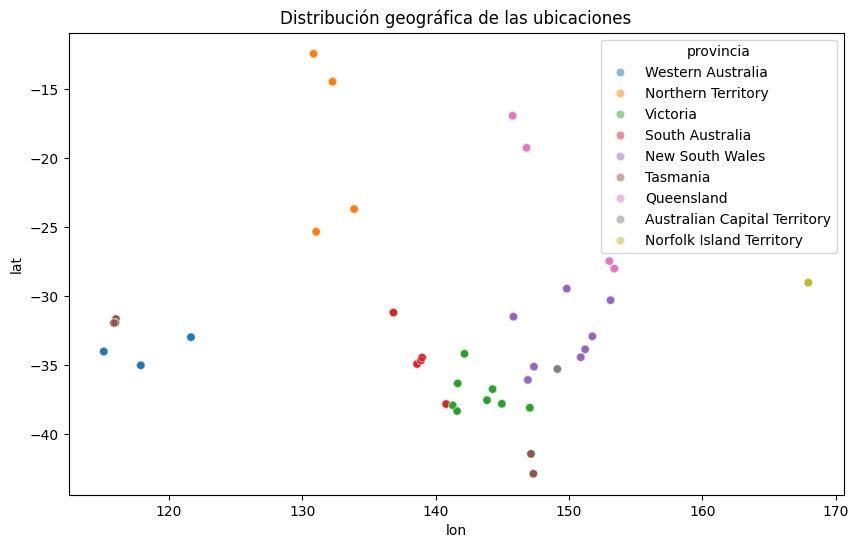

In [166]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train, x='lon', y='lat', hue='provincia', alpha=0.5)
plt.title('Distribución geográfica de las ubicaciones')

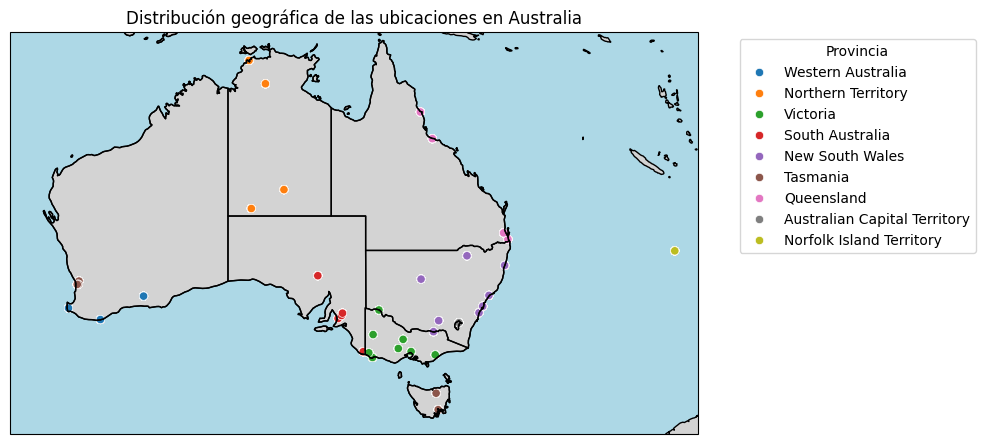

In [167]:
# Crear la figura con proyección cartográfica
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Añadir el mapa de fondo de Australia
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # Continentes
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # Océanos
ax.add_feature(cfeature.COASTLINE, edgecolor='black')  # Líneas costeras
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')  # Fronteras
ax.add_feature(cfeature.STATES, edgecolor='black')  # Divisiones estatales (provincias)

# Establecer el límite del mapa para centrarse en Australia
ax.set_extent([110, 170, -45, -10], crs=ccrs.PlateCarree())

# Scatter plot con seaborn
sns.scatterplot(data=X_train, x='lon', y='lat', hue='provincia', alpha=1, ax=ax, transform=ccrs.PlateCarree())

# Añadir título y leyenda
plt.title('Distribución geográfica de las ubicaciones en Australia')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el diseño para evitar recortes
plt.tight_layout()
plt.show()

# Imputacion por provincia

In [168]:
X_train_imputado = X_train.copy()
X_test_imputado = X_test.copy()

cols_numericas = X_train.select_dtypes(include='number').columns
cols_categoricas = X_train.select_dtypes(exclude='number').columns.drop('provincia', errors='ignore')

# imputamos las numericas con la media

# Calculamos las medias de X_train agrupadas por provincia
medias_por_prov = X_train.groupby('provincia')[cols_numericas].mean()

# X_train
fill_values_train_num = X_train.groupby('provincia')[cols_numericas].transform('mean')
X_train_imputado = X_train_imputado.fillna(fill_values_train_num)

# X_test:
for col in cols_numericas:
    fill_values_test_num = X_test_imputado['provincia'].map(medias_por_prov[col])
    X_test_imputado[col] = X_test_imputado[col].fillna(fill_values_test_num)

# imputamos categoricas

# Calculamos las modas de X_train agrupadas por provincia
calc_moda = lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA
modas_por_prov = X_train.groupby('provincia')[cols_categoricas].agg(calc_moda)

# X_train
fill_values_train_cat = X_train.groupby('provincia')[cols_categoricas].transform(calc_moda)
X_train_imputado = X_train_imputado.fillna(fill_values_train_cat)

# X_test
for col in cols_categoricas:
    fill_values_test_cat = X_test_imputado['provincia'].map(modas_por_prov[col])
    X_test_imputado[col] = X_test_imputado[col].fillna(fill_values_test_cat)

In [169]:
print(X_train_imputado.isna().sum())
print(X_test_imputado.isna().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
provincia        0
lat              0
lon              0
dtype: int64
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
provincia        0
lat              0
lon              0
dtype: int64


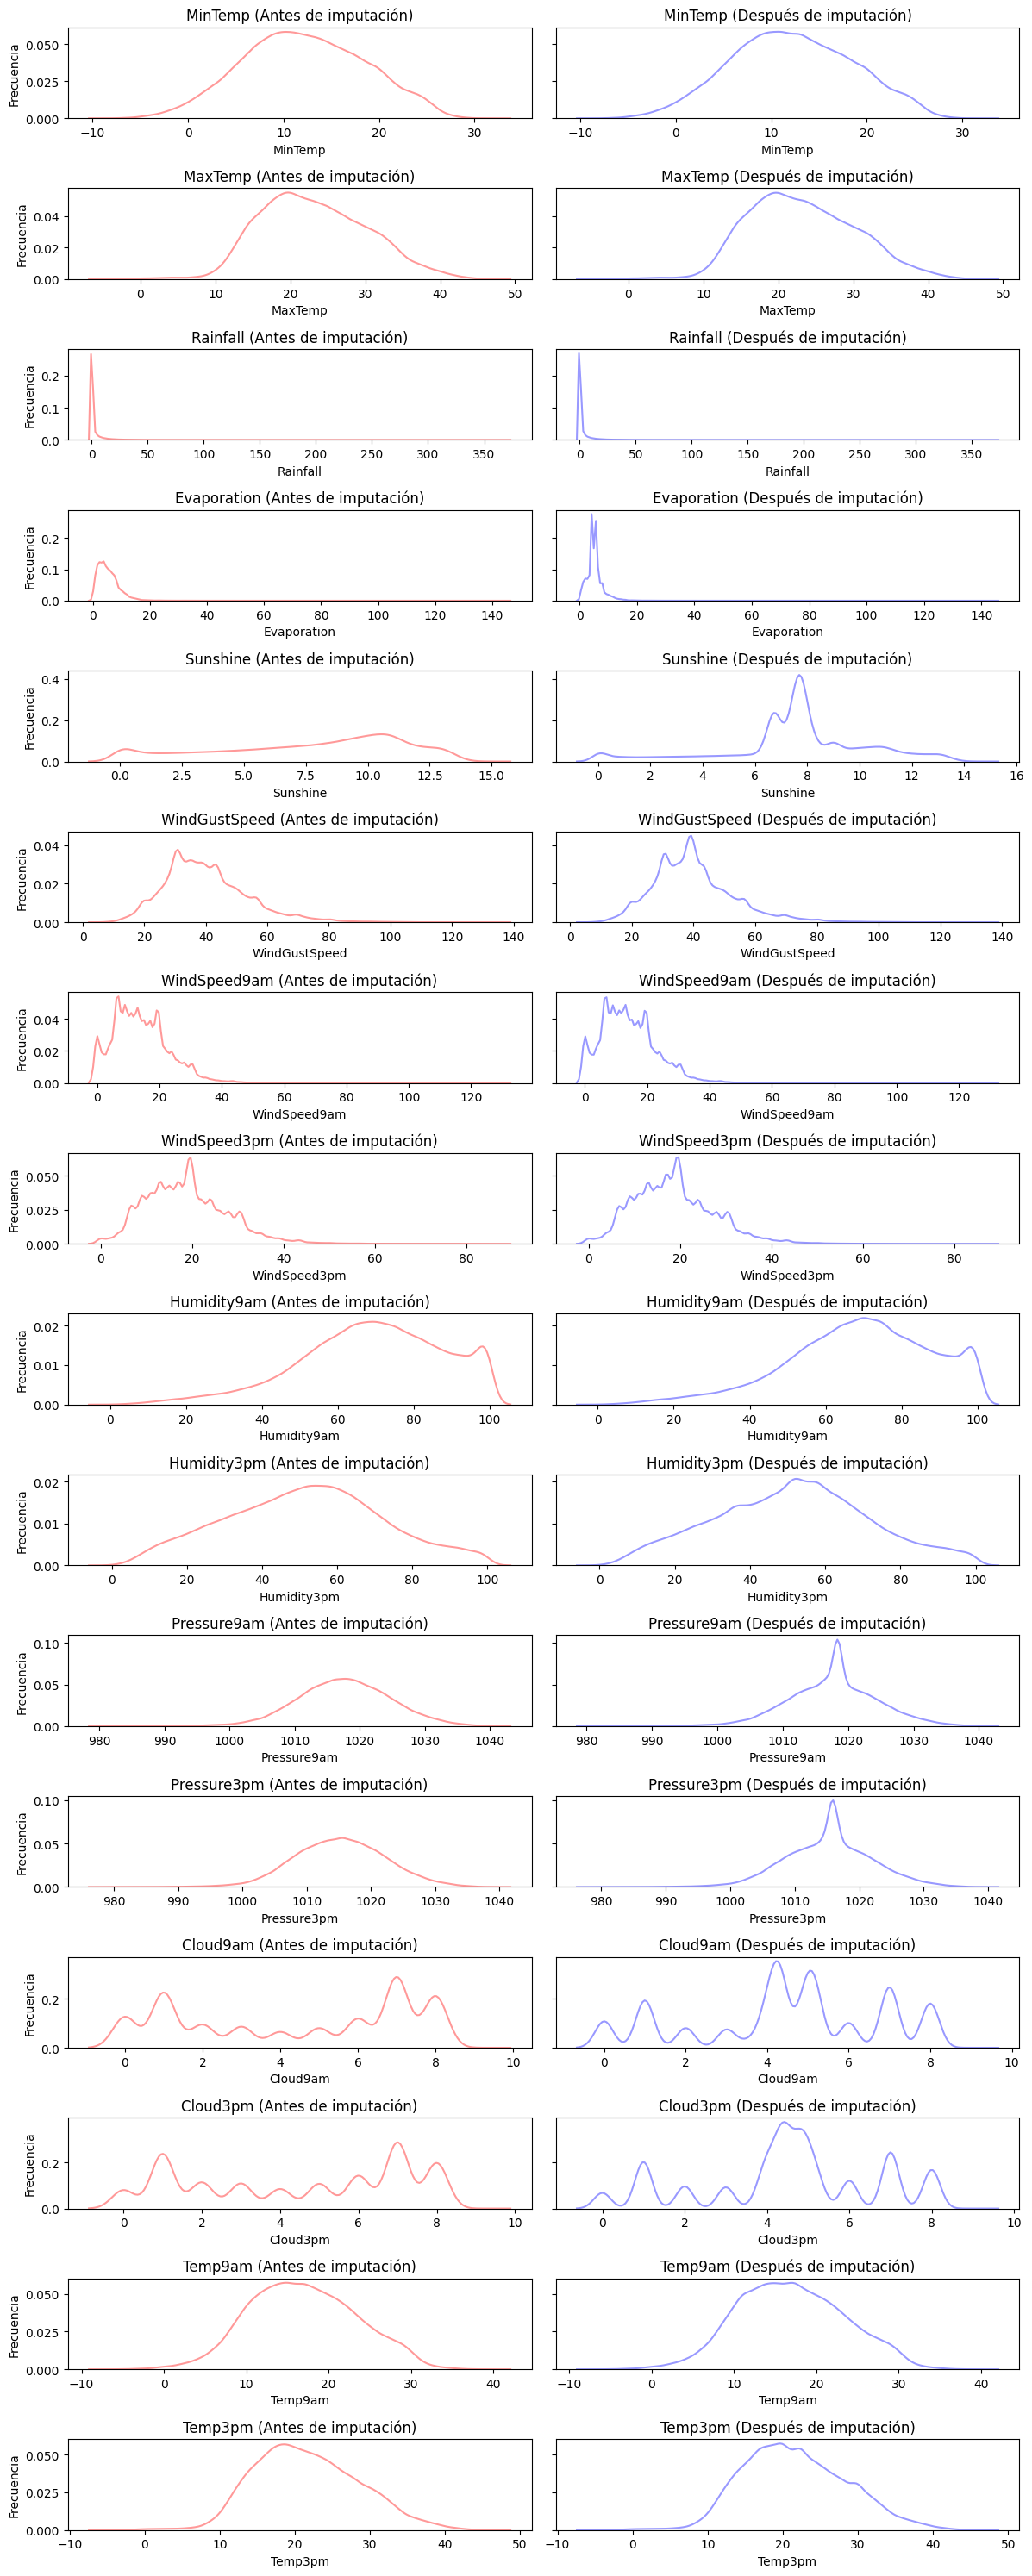

In [170]:
# Graficos comparativos antes y después de la imputación

cols_a_escalar = [
    'MinTemp',
    'MaxTemp',
    'Rainfall',
    'Evaporation',
    'Sunshine',
    'WindGustSpeed',
    'WindSpeed9am',
    'WindSpeed3pm',
    'Humidity9am',
    'Humidity3pm',
    'Pressure9am',
    'Pressure3pm',
    'Cloud9am',
    'Cloud3pm',
    'Temp9am',
    'Temp3pm'
]

fig, axes = plt.subplots(nrows=len(cols_a_escalar), ncols=2, figsize=(12, 30), sharey='row')

for i, col in enumerate(cols_a_escalar):
    data_antes = X_train[col].dropna()
    sns.kdeplot(data=data_antes,  color='red', alpha=0.4, ax=axes[i][0])
    axes[i][0].set_title(f'{col} (Antes de imputación)')
    axes[i][0].set_xlabel(col)
    axes[i][0].set_ylabel('Frecuencia')

    # Después de la imputación
    data_despues = X_train_imputado[col]
    sns.kdeplot(data=data_despues,  color='blue', alpha=0.4, ax=axes[i][1])
    axes[i][1].set_title(f'{col} (Después de imputación)')
    axes[i][1].set_xlabel(col)
    axes[i][1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Graficos

In [171]:
X_train_imputado["Date"] = pd.to_datetime(X_train_imputado["Date"], format="%Y-%m-%d")
X_train_imputado["year"] = X_train_imputado["Date"].dt.year
X_train_imputado["month"] = X_train_imputado["Date"].dt.month
X_train_imputado["day"] = X_train_imputado["Date"].dt.day
X_test_imputado["Date"] = pd.to_datetime(X_test_imputado["Date"], format="%Y-%m-%d")
X_test_imputado["year"] = X_test_imputado["Date"].dt.year
X_test_imputado["month"] = X_test_imputado["Date"].dt.month
X_test_imputado["day"] = X_test_imputado["Date"].dt.day

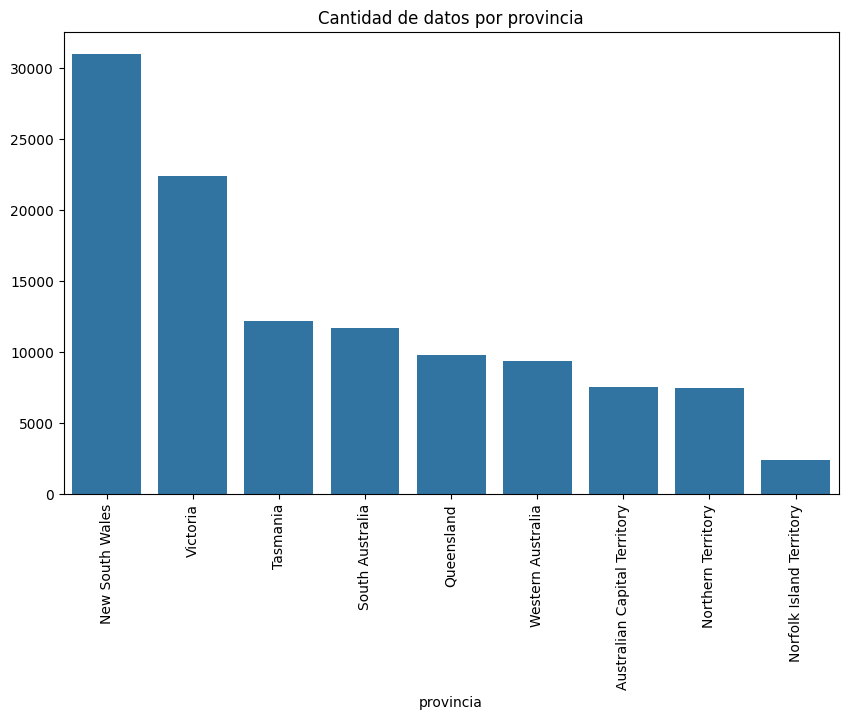

In [172]:
location_counts = X_train_imputado['provincia'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.index, y=location_counts.values)
plt.title('Cantidad de datos por provincia')
plt.xticks(rotation=90)
plt.show()

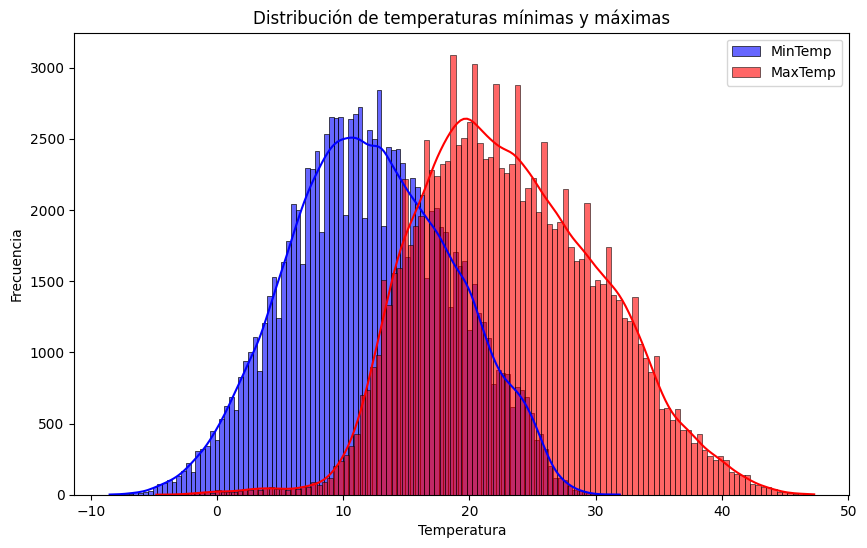

In [173]:
plt.figure(figsize=(10, 6))
sns.histplot(data=X_train_imputado, x="MinTemp", color="blue", label="MinTemp", kde=True, alpha=0.6)
sns.histplot(data=X_train_imputado, x="MaxTemp", color="red", label="MaxTemp", kde=True, alpha=0.6)
plt.legend()
plt.title("Distribución de temperaturas mínimas y máximas")
plt.xlabel("Temperatura")
plt.ylabel("Frecuencia")
plt.show()

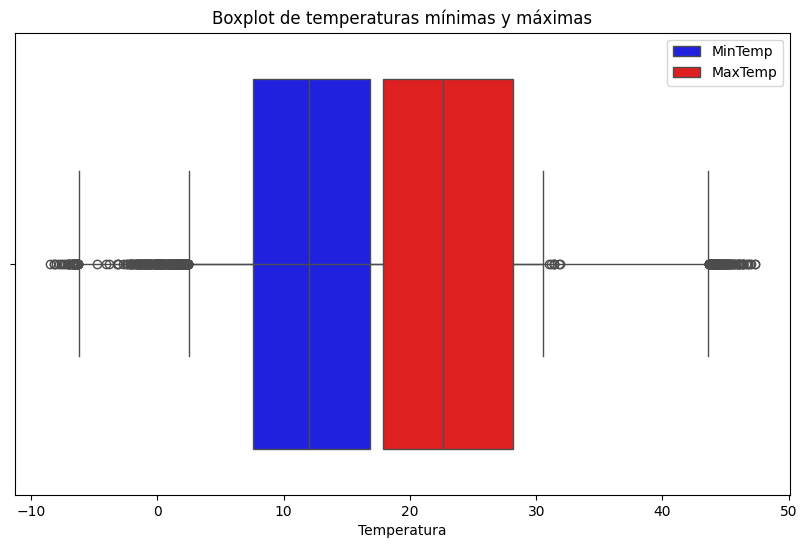

In [174]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train_imputado, x="MinTemp", color="blue", label="MinTemp")
sns.boxplot(data=X_train_imputado, x="MaxTemp", color="red", label="MaxTemp")
plt.title("Boxplot de temperaturas mínimas y máximas")
plt.xlabel("Temperatura")
plt.show()

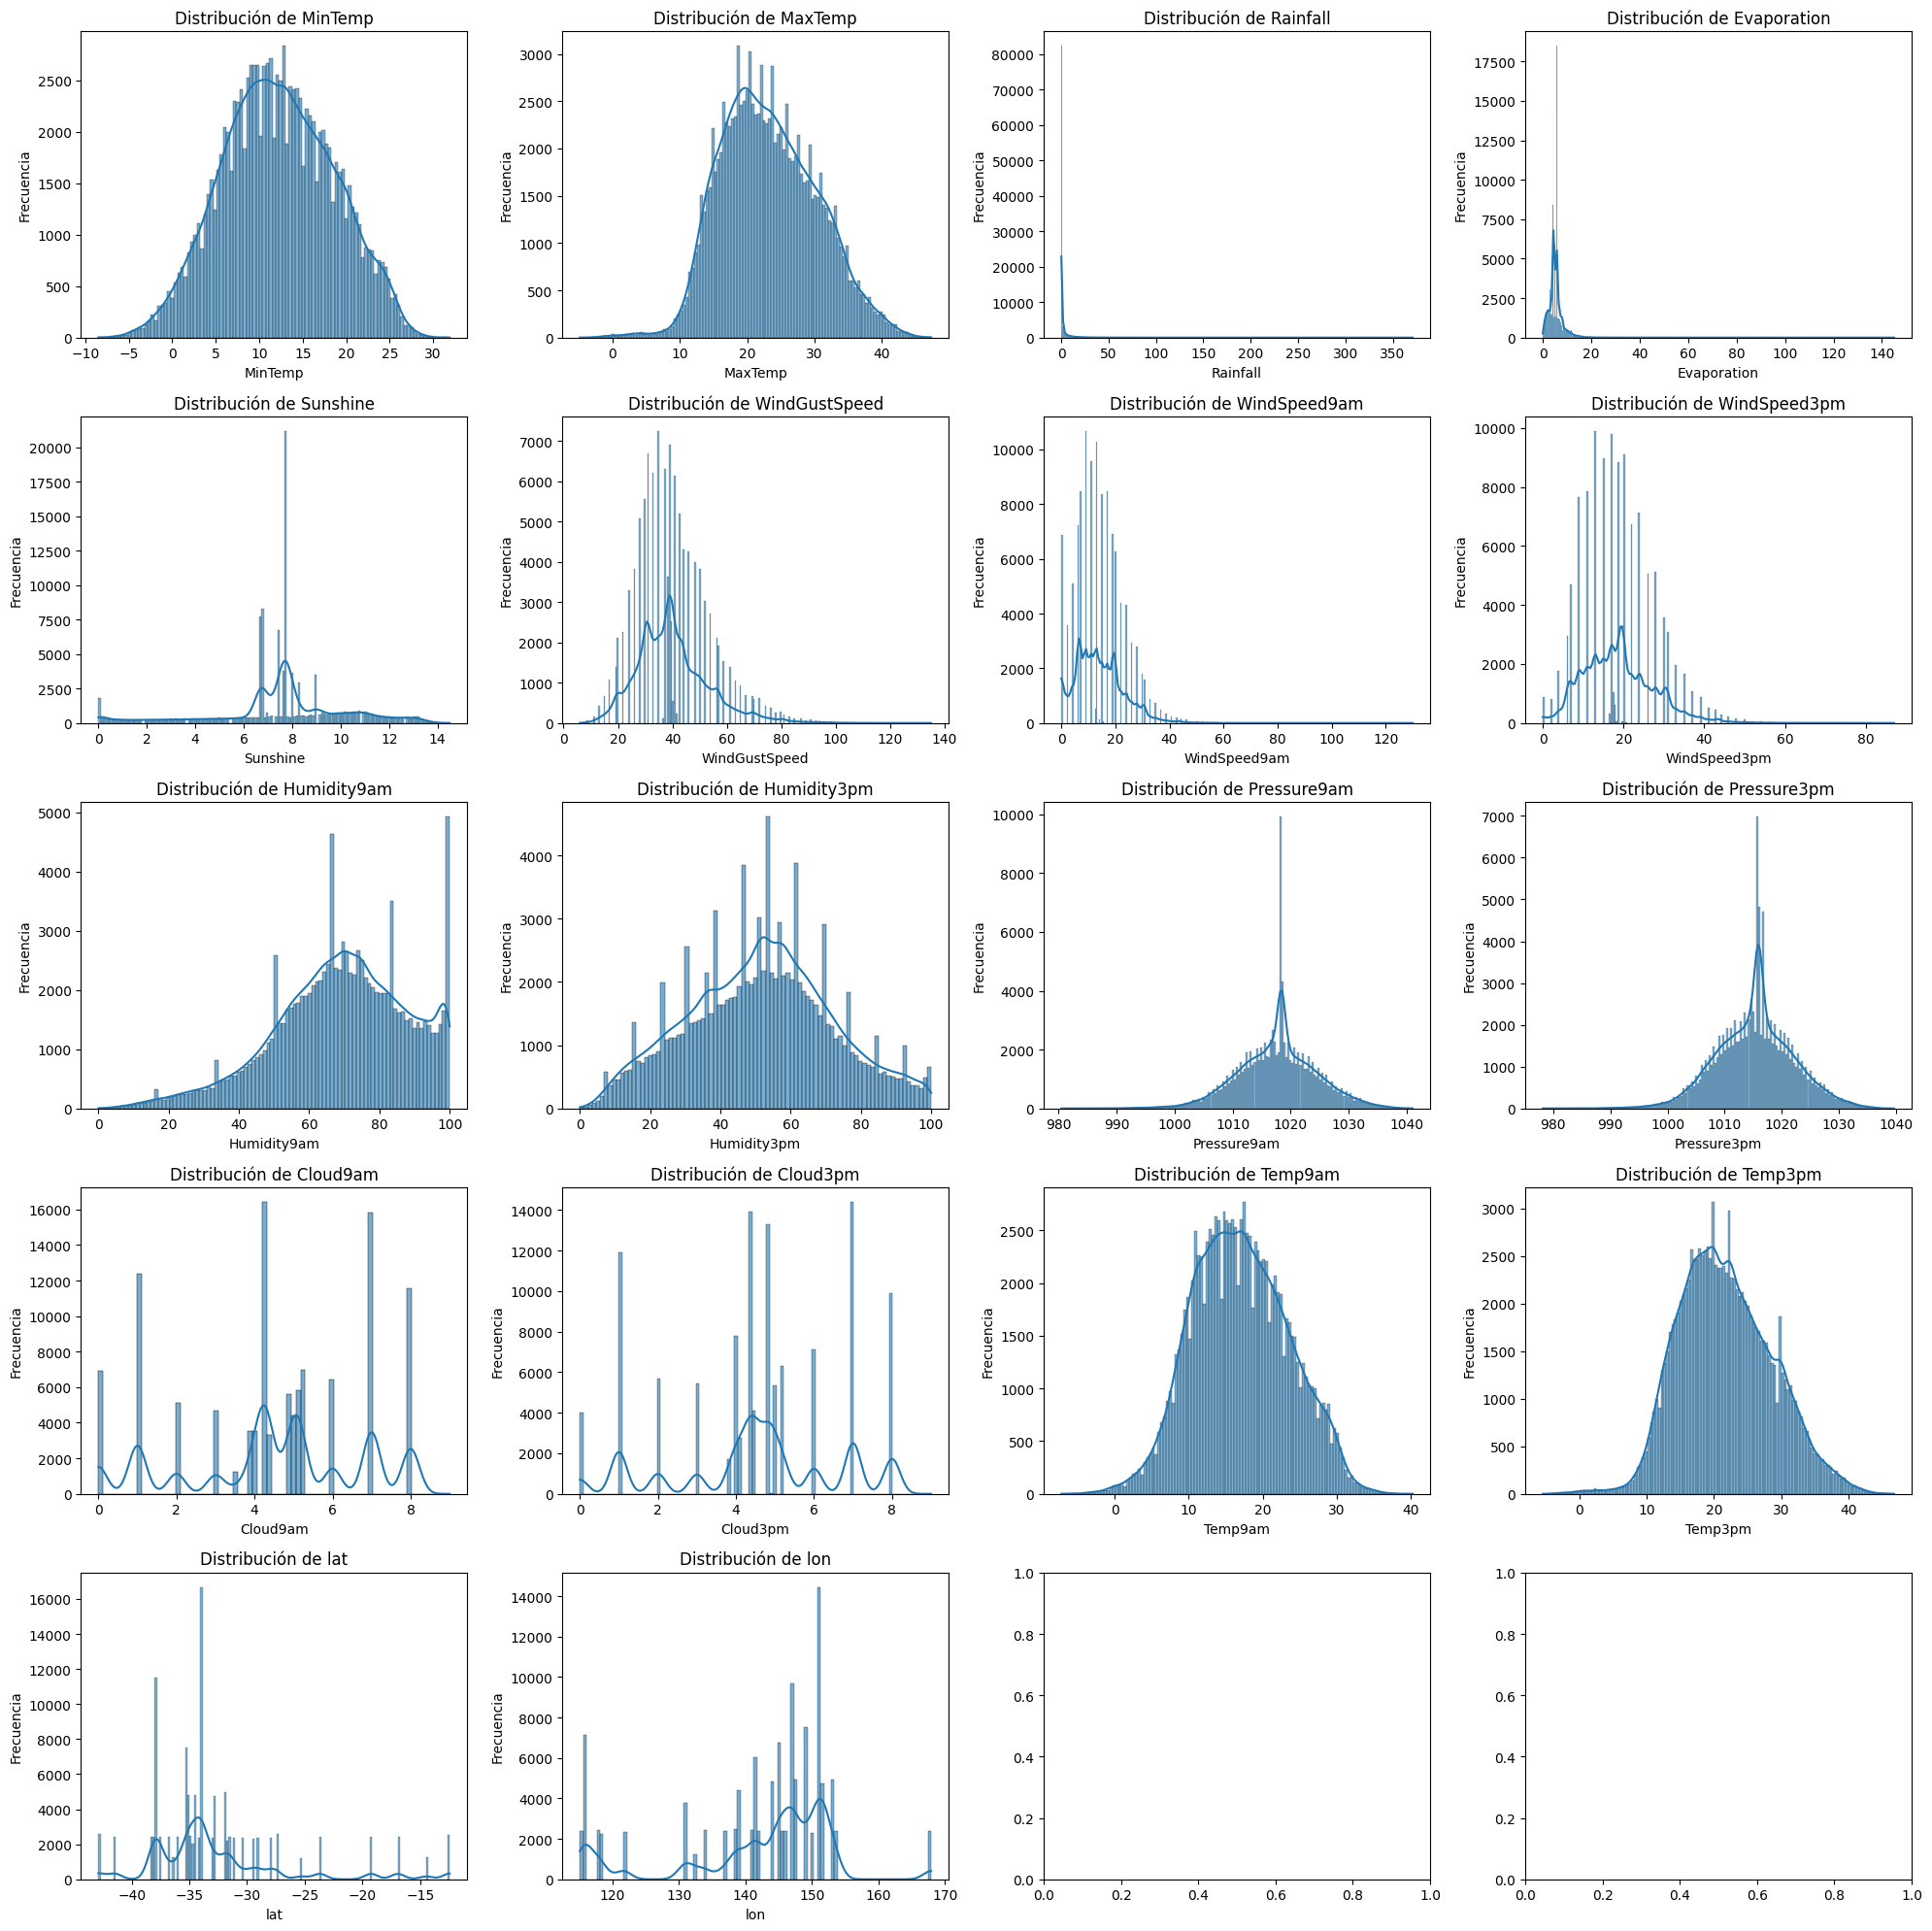

In [175]:
# Gráficos de distribución para todas las columnas numéricas

numeric_cols = X_train_imputado.select_dtypes(include=['float64']).columns

# subplots 5 filas 4 columnas
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(data=X_train_imputado, x=col, kde=True, ax=axes[i], alpha=0.6)
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

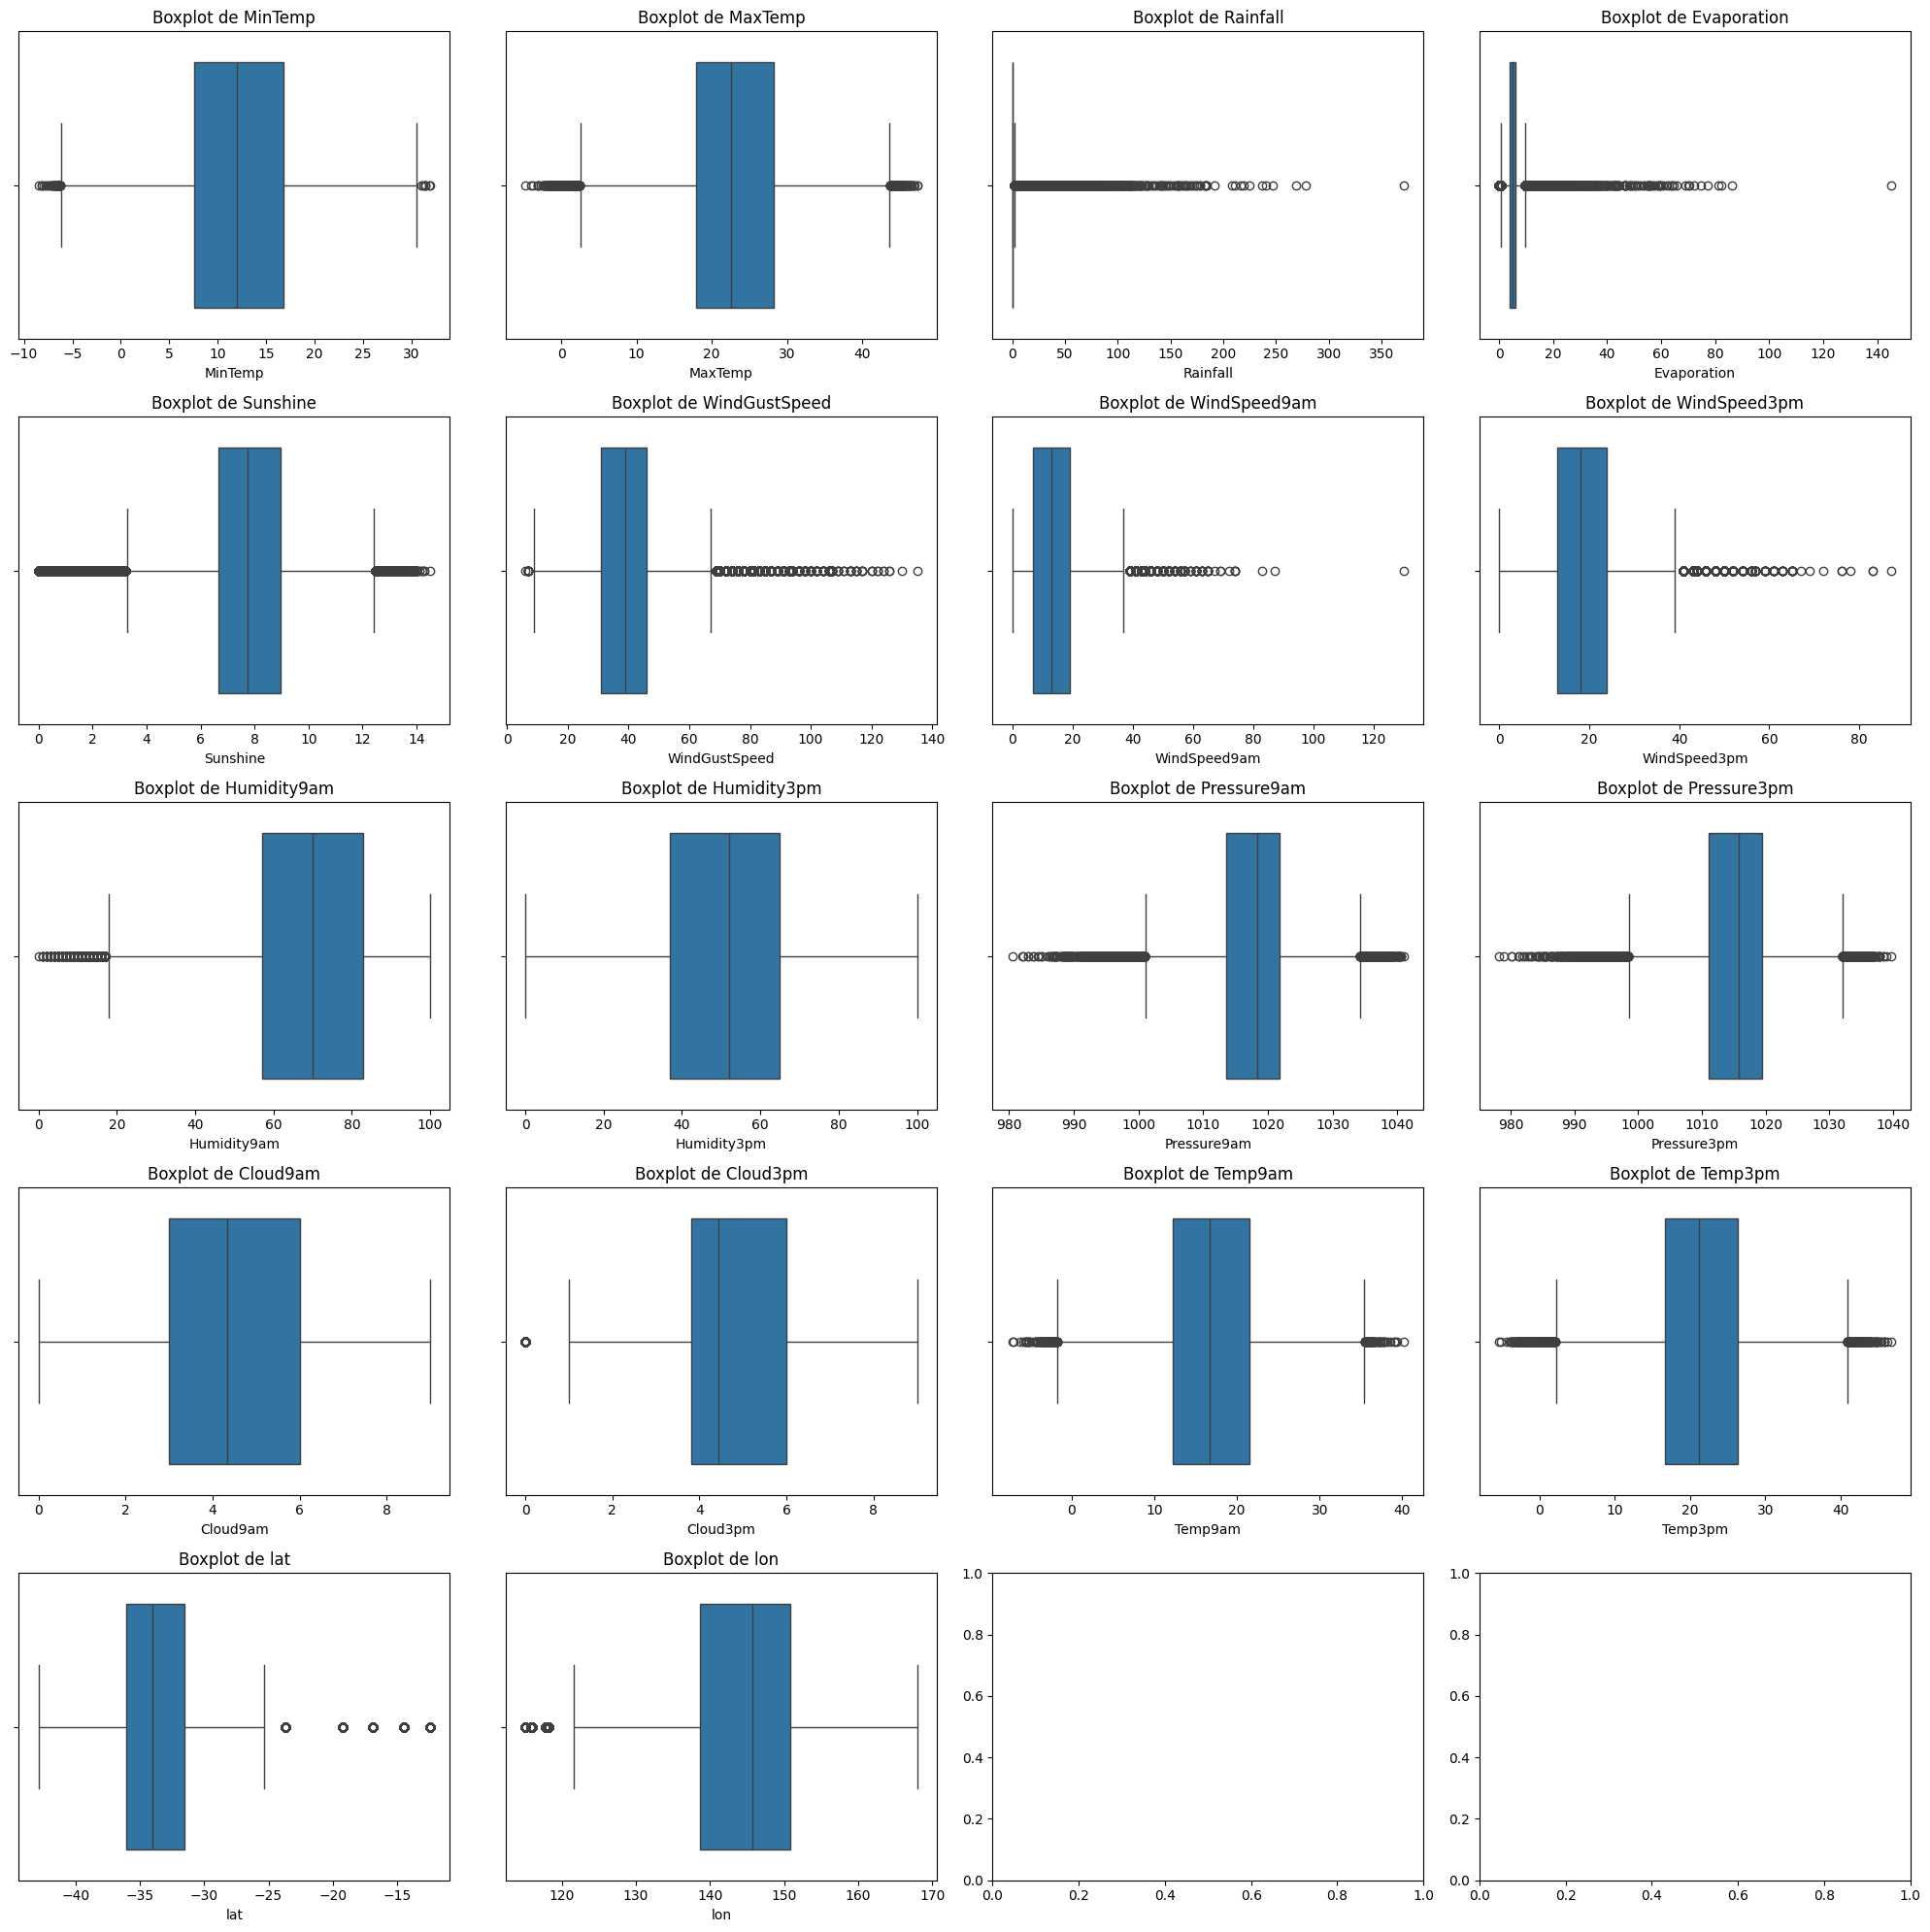

In [176]:
# Gráficos de boxplot para las columnas numéricas

numeric_cols = X_train_imputado.select_dtypes(include=['float64']).columns

# Subplots 5 filas 4 columnas boxplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=X_train_imputado, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel(col)
plt.tight_layout()
plt.show()

<Axes: xlabel='count', ylabel='RainTomorrow'>

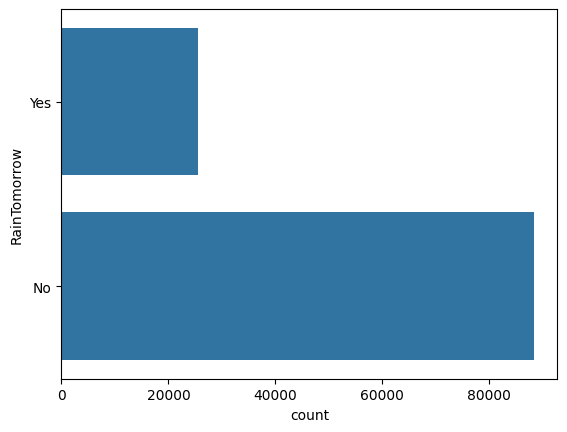

In [177]:
# variable objetivo
sns.countplot(y_train)

La variable objetivo esta bastante desbalanceada

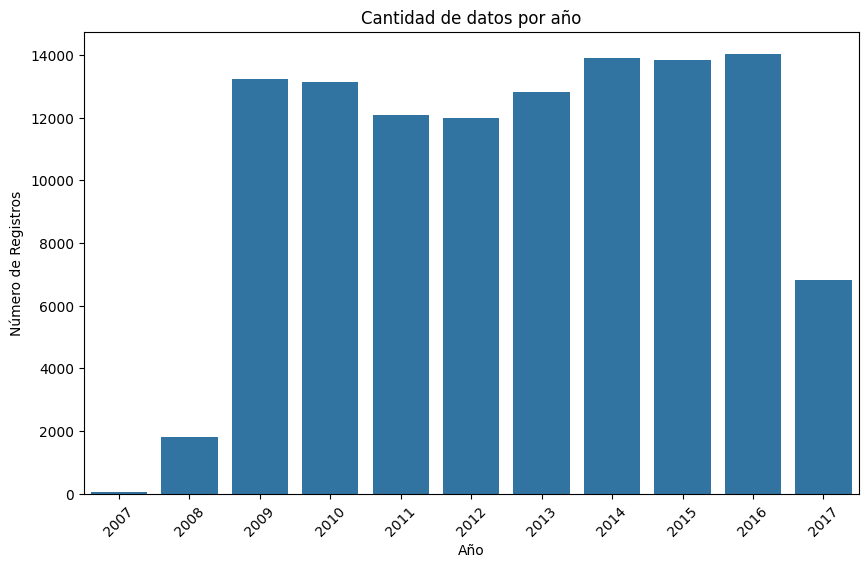

In [178]:
# Graficamos por año
year_counts = X_train_imputado['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Cantidad de datos por año')
plt.xlabel('Año')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)
plt.show()

## Correlaciones

In [179]:
# transformamos y_train a numerica
y_train = y_train.map({'No': 0, 'Yes': 1})
y_test = y_test.map({'No': 0, 'Yes': 1})

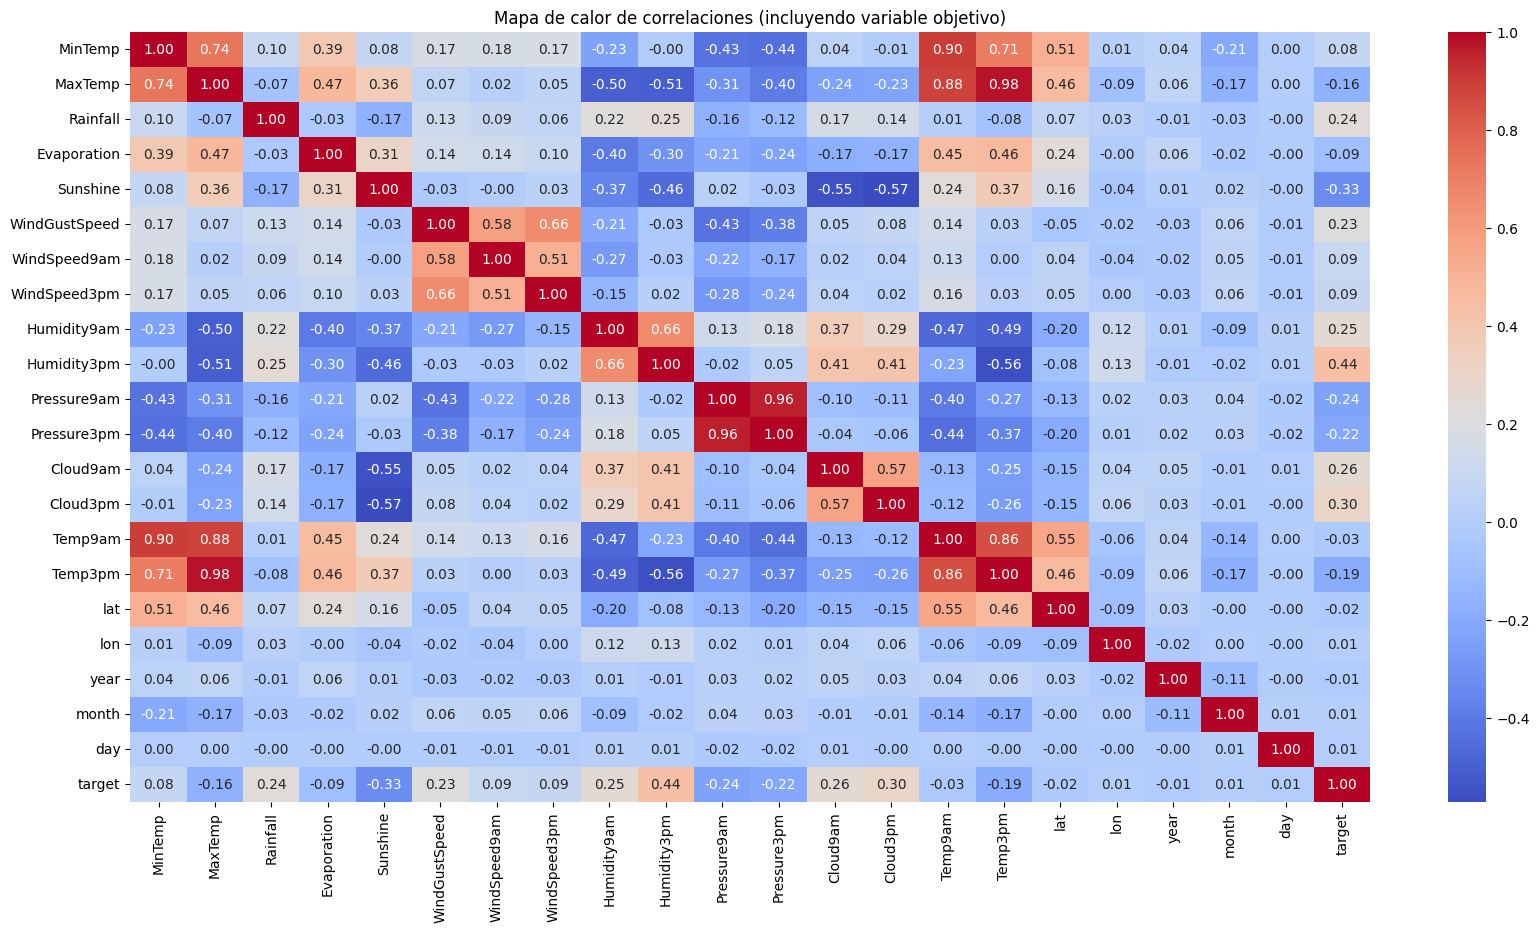

In [180]:
# Mapa de correlaciones incluyendo variable objetivo

data_combined = X_train_imputado.copy()
data_combined['target'] = y_train

data_combined_numeric = data_combined.select_dtypes(include=['float64', 'int64', "int32"])  # int32 son los datos de year, mouth y day

corr = data_combined_numeric.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones (incluyendo variable objetivo)")
plt.show()

# Tratamiento variables categoricas

In [181]:
# Covertir variables objeto a categoricas
cols_categoricas = X_train_imputado.select_dtypes(include=['object']).columns
for col in cols_categoricas:
    X_train_imputado[col] = X_train_imputado[col].astype('category')
    X_test_imputado[col] = X_test_imputado[col].astype('category')
X_train_imputado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113761 entries, 111548 to 121958
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           113761 non-null  datetime64[ns]
 1   Location       113761 non-null  category      
 2   MinTemp        113761 non-null  float64       
 3   MaxTemp        113761 non-null  float64       
 4   Rainfall       113761 non-null  float64       
 5   Evaporation    113761 non-null  float64       
 6   Sunshine       113761 non-null  float64       
 7   WindGustDir    113761 non-null  category      
 8   WindGustSpeed  113761 non-null  float64       
 9   WindDir9am     113761 non-null  category      
 10  WindDir3pm     113761 non-null  category      
 11  WindSpeed9am   113761 non-null  float64       
 12  WindSpeed3pm   113761 non-null  float64       
 13  Humidity9am    113761 non-null  float64       
 14  Humidity3pm    113761 non-null  float64       
 15  

In [182]:
# Convertimos Date a datetime
X_train_imputado["Date"] = pd.to_datetime(X_train_imputado["Date"], format="%Y-%m-%d")
X_test_imputado["Date"] = pd.to_datetime(X_test_imputado["Date"], format="%Y-%m-%d")

In [183]:
# aplicamos label Encoding a WindGustDir, WindDir9am, WindDir3pm, rainToday y provincia
columnas_label = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',"provincia","Location"]
label_encoders = {}
for col in columnas_label:
    le = LabelEncoder()
    X_train_imputado[col] = le.fit_transform(X_train_imputado[col])
    X_test_imputado[col] = le.transform(X_test_imputado[col])
    label_encoders[col] = le

# Escalar

In [184]:
# Crear otro df con solo valores numericos
X_train_escalado = X_train_imputado.select_dtypes(include=['float64', 'int64', "int32"]) 
X_test_escalado = X_test_imputado.select_dtypes(include=['float64', 'int64', "int32"])  

In [185]:
# Escalar X_train_escalado y X_test_escalado con standarscaler
scaler = StandardScaler()
X_train_escalado = pd.DataFrame(scaler.fit_transform(X_train_escalado), columns=X_train_escalado.columns, index=X_train_escalado.index)
X_test_escalado = pd.DataFrame(scaler.transform(X_test_escalado), columns=X_test_escalado.columns, index=X_test_escalado.index)

# Regresion Logistica

In [192]:
model = LogisticRegression(random_state=42)

model.fit(X_train_escalado, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
y_pred_train = model.predict(X_train_escalado) 

# Calcular métricas en Train

accuracy_logreg_train = accuracy_score(y_train, y_pred_train) 
classification_report_logreg_train = classification_report(y_train, y_pred_train)

print("Métricas en Entrenamiento (Train)")
print(f'Exactitud (Train): {accuracy_logreg_train}')
print("Reporte de clasificación (Train):")
print(classification_report_logreg_train)

Métricas en Entrenamiento (Train)
Exactitud (Train): 0.8442787950176247
Reporte de clasificación (Train):
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     88304
           1       0.72      0.49      0.59     25457

    accuracy                           0.84    113761
   macro avg       0.79      0.72      0.75    113761
weighted avg       0.83      0.84      0.83    113761



In [196]:
y_pred = model.predict(X_test_escalado)

# Calcular métricas en test
accuracy_logreg = accuracy_score(y_test, y_pred)

classification_report_logreg = classification_report(y_test, y_pred)

print("Métricas en test:")
print(f'Exactitud: {accuracy_logreg}')
print("Reporte de clasificación:")
print(classification_report_logreg)

Métricas en test:
Exactitud: 0.8412352279122116
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     22012
           1       0.72      0.49      0.58      6420

    accuracy                           0.84     28432
   macro avg       0.79      0.72      0.74     28432
weighted avg       0.83      0.84      0.83     28432



El modelo es mucho mejor prediciendo días sin lluvia que días con lluvia.

Lluvia Recall: 0.49 solo detecta el 49% de los dias de lluvia a diferencia del Recall: 0.94 en no lluvia.

Lo mismo pasa con el f1-score

Esto puede deberse al desbalance de clases.

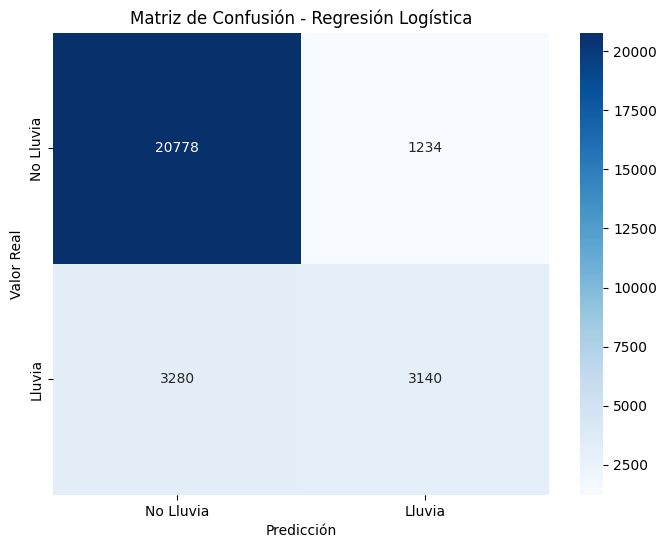

In [188]:
confusion_matrix_logreg = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Lluvia', 'Lluvia'],
            yticklabels=['No Lluvia', 'Lluvia'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

FN (Falsos Negativos): 3280  Son los días de lluvia que el modelo no detectó, este valor es malo, coincide con el recall visto previamente

In [ ]:
# Obtenemos las probabilidades de predicción del modelo
y_probs = model.predict_proba(X_test_escalado)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

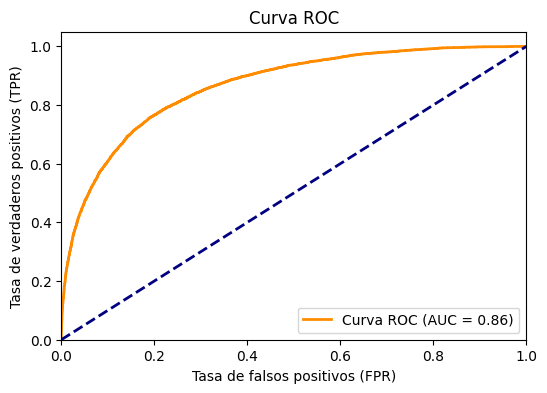

In [190]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

La curva se encuentra muy por encima de la diagonal, lo que confirma que las predicciones son significativamente mejores que el azar.